Washing Time: 32.88888888888891


/home/user/.local/lib/python3.6/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


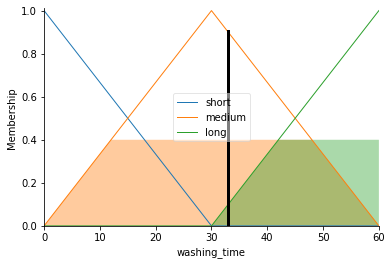

In [11]:
# 6. Write a program to implement Fuzzy Controller(Washing Machine)

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Create fuzzy variables
dirtiness = ctrl.Antecedent(np.arange(0, 11, 1), 'dirtiness')
stain_type = ctrl.Antecedent(np.arange(0, 11, 1), 'stain_type')
washing_time = ctrl.Consequent(np.arange(0, 61, 1), 'washing_time')

# Define membership functions
dirtiness.automf(3, names=['low', 'medium', 'high'])
stain_type.automf(3, names=['low', 'medium', 'high'])
washing_time.automf(3, names=['short', 'medium', 'long'])

# Define rules
rule1 = ctrl.Rule(dirtiness['low'] & stain_type['low'], washing_time['short'])
rule2 = ctrl.Rule(dirtiness['medium'] & stain_type['medium'], washing_time['medium'])
rule3 = ctrl.Rule(dirtiness['high'] & stain_type['high'], washing_time['long'])

# Create control system
washing_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
washing_machine = ctrl.ControlSystemSimulation(washing_ctrl)

# Example usage
if __name__ == "__main__":
    # Set input values
    washing_machine.input['dirtiness'] = 7
    washing_machine.input['stain_type'] = 8

    # Compute the result
    washing_machine.compute()

    # Print the output
    print("Washing Time:", washing_machine.output['washing_time'])

    # Visualize the result (optional, comment if not needed)
    washing_time.view(sim=washing_machine)
